In [96]:
import pandas as pd
import numpy as np
import torch
from tqdm import tqdm

from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import SGDClassifier, LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.svm import LinearSVC
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split, cross_val_score
from scipy import sparse
import math
from keras.layers import Input, Dense, LSTM, Embedding
from keras.layers import Dropout, Activation, Bidirectional, GlobalMaxPool1D
from keras.models import Sequential
from keras import backend as K
from keras.callbacks import EarlyStopping
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "-1"
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Machine Learning

## 1.1. Modeling on Meta-Information (without lyrics representations)

In [14]:
meta_train = pd.read_csv("meta_train.csv")
meta_test = pd.read_csv("meta_test.csv")

In [15]:
X_train_meta = meta_train.drop(['Genre', 'lyrics'], axis = 1)
y_train_meta = meta_train['Genre']

X_test_meta = meta_test.drop(['Genre', 'lyrics'], axis = 1)
y_test_meta = meta_test['Genre']

#### Defining the models

In [16]:
nb = MultinomialNB()
sgd = SGDClassifier()
svm = LinearSVC()
rf = RandomForestClassifier()
lgb = LGBMClassifier()
xgb = XGBClassifier()

#### Choosing a classifier

In [19]:
def cross_validation(classifier, X, y):
    scores = cross_val_score(classifier, X, y, cv = 5, scoring = 'accuracy')
    return scores.mean()

classifiers = {
    'Multinomial Naive Bayes': nb,
    'Stochastic Gradient Descent': sgd,
    'Support Vector Machines': svm,
    'Random Forest': rf,
    'Light GBM': lgb,
    'XGBoost': xgb
}

for clf in classifiers:
    scores = cross_validation(classifiers[clf], X_train_meta, y_train_meta)
    print ('\t {} - {}'.format(clf, scores))

	 Multinomial Naive Bayes - 0.1713931335770652
	 Stochastic Gradient Descent - 0.19888845655390894


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


	 Support Vector Machines - 0.12413256411749027
	 Random Forest - 0.2813162718096341
	 Light GBM - 0.3224221662083381
[14:37:14] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[14:37:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[14:37:19] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[14:37:22] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[14:37:25] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
	 XGBoost - 0.31750675091800673


## 1.2. Modeling only on Lyrics representations

In [20]:
word_vectorizer = TfidfVectorizer(analyzer = 'word',
                                 token_pattern = r'\w{1,}',
                                 ngram_range = (1, 1),
                                 max_features = 5000)

train_lyrics_words = word_vectorizer.fit_transform(meta_train['lyrics'])
test_lyrics_words = word_vectorizer.transform(meta_test['lyrics'])

In [21]:
for clf in classifiers:
    scores = cross_validation(classifiers[clf], train_lyrics_words, y_train_meta)
    print ('\t {} - {}'.format(clf, scores))

	 Multinomial Naive Bayes - 0.376113575031444
	 Stochastic Gradient Descent - 0.3826492690013047
	 Support Vector Machines - 0.37541096017319464
	 Random Forest - 0.3959918316408805
	 Light GBM - 0.41095458542309427


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[14:43:58] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[14:45:33] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[14:47:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[14:48:39] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[14:50:11] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
	 XGBoost - 0.3991798522756601


## 1.3. Modeling on Meta-Information (with lyrics representations)

In [22]:
meta_information_train = sparse.coo_matrix(X_train_meta)
combined_train_features = sparse.hstack([train_lyrics_words,
                                        meta_information_train])

meta_information_test = sparse.coo_matrix(X_test_meta)
combined_test_features = sparse.hstack([test_lyrics_words,
                                        meta_information_test])

In [23]:
for clf in classifiers:
    scores = cross_validation(classifiers[clf], combined_train_features, y_train_meta)
    print ('\t {} - {}'.format(clf, scores))

	 Multinomial Naive Bayes - 0.17252743661490172
	 Stochastic Gradient Descent - 0.18759666443593487


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


	 Support Vector Machines - 0.15384077593867632
	 Random Forest - 0.4083619761336501
	 Light GBM - 0.4409341616073991


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:02:39] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:04:13] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:05:45] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:07:17] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:08:49] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
	 XGBoost - 0.4318050559265904


It seems meta-information help us, but in a good combination with Light GBM. Let's try some Neural Networks.

##### Evaluation on test dataset

Metadata without lyrics - Multinomial Naive Bayes: Accuracy 0.1688720856962823


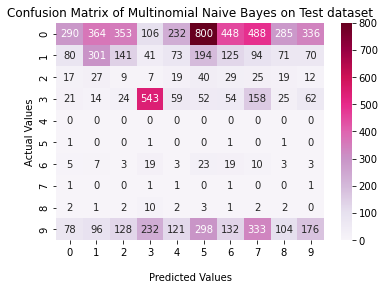

Only lyrics - Multinomial Naive Bayes: Accuracy 0.3876496534341525


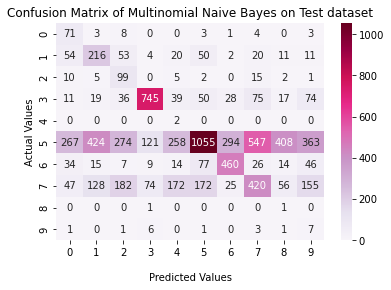

Metadata with lyrics - Multinomial Naive Bayes: Accuracy 0.1692501575299307


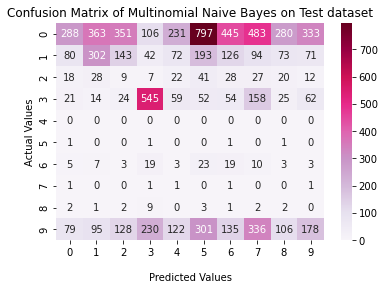


Metadata without lyrics - Stochastic Gradient Descent: Accuracy 0.09615626969124133


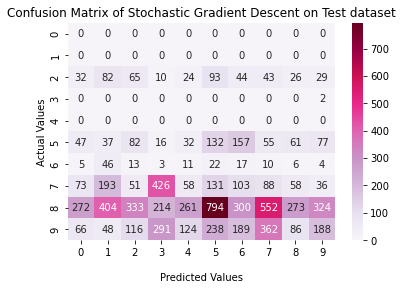

Only lyrics - Stochastic Gradient Descent: Accuracy 0.3866414618777568


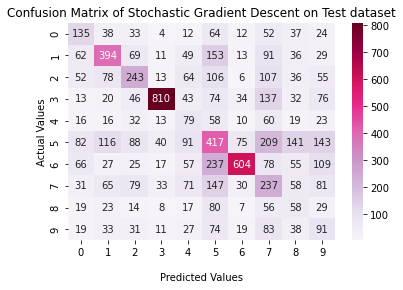

Metadata with lyrics - Stochastic Gradient Descent: Accuracy 0.21146817895400127


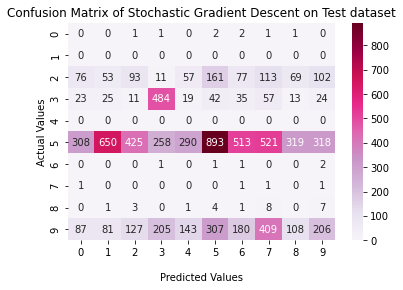

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Metadata without lyrics - Support Vector Machines: Accuracy 0.08481411468178954


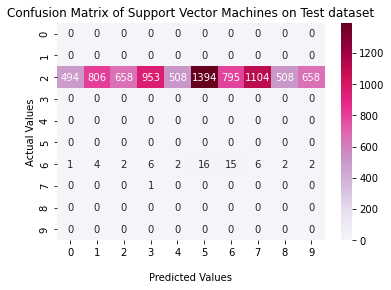

Only lyrics - Support Vector Machines: Accuracy 0.3794580970384373


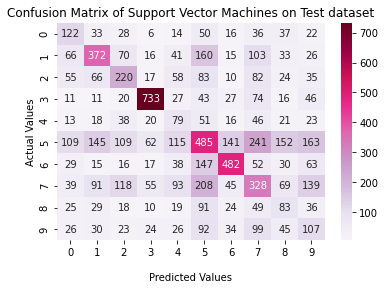

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Metadata with lyrics - Support Vector Machines: Accuracy 0.1299306868304978


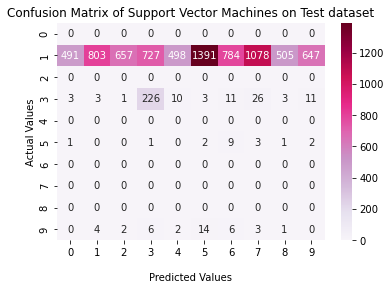


Metadata without lyrics - Random Forest: Accuracy 0.2775047258979206


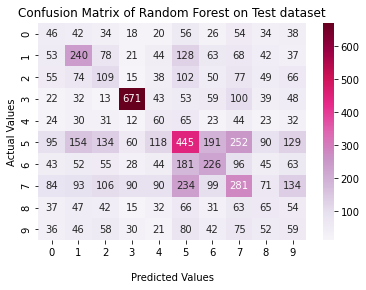

Only lyrics - Random Forest: Accuracy 0.39332073093887837


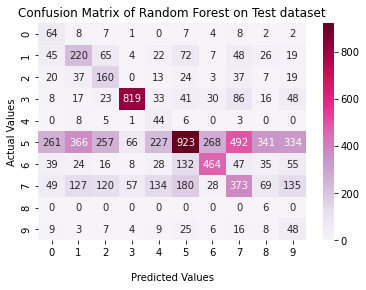

Metadata with lyrics - Random Forest: Accuracy 0.40970384373030877


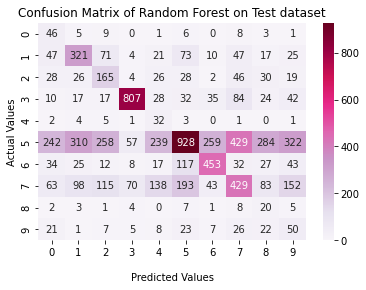


Metadata without lyrics - Light GBM: Accuracy 0.3253938248267171


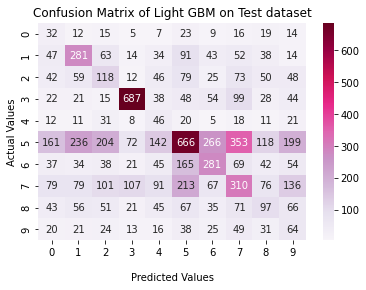

Only lyrics - Light GBM: Accuracy 0.41877756773787017


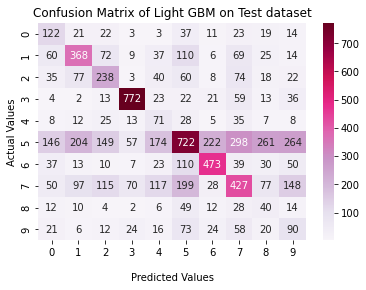

C:\ProgramData\Anaconda3\lib\site-packages\lightgbm\basic.py:859: UserWarning: Converting data to scipy sparse matrix.
  _log_warning('Converting data to scipy sparse matrix.')


Metadata with lyrics - Light GBM: Accuracy 0.44549464398235666


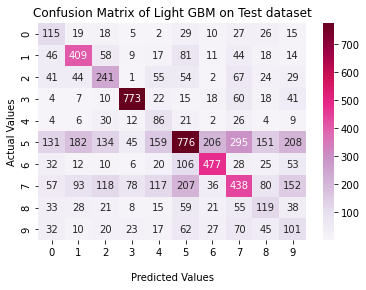


[22:16:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Metadata without lyrics - XGBoost: Accuracy 0.3139256458727158


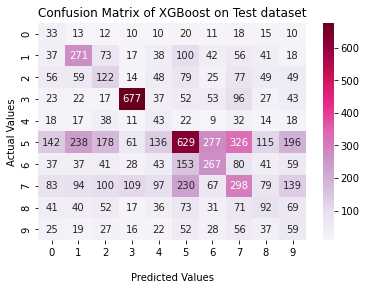

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[22:16:11] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Only lyrics - XGBoost: Accuracy 0.4003780718336484


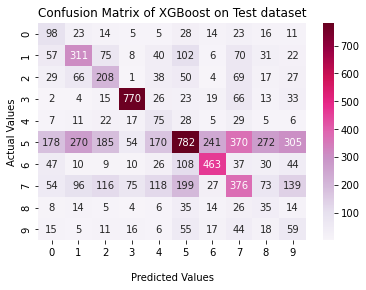

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[22:18:15] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Metadata with lyrics - XGBoost: Accuracy 0.43276622558286076


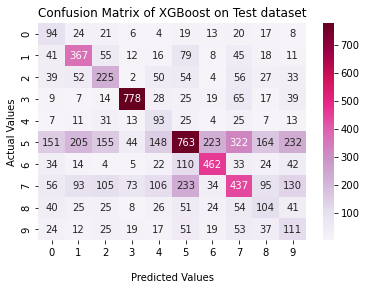

In [99]:
datasets = {
    'Metadata without lyrics': (X_train_meta, y_train_meta, X_test_meta, y_test_meta),
    'Only lyrics': (train_lyrics_words, y_train_meta, test_lyrics_words, y_test_meta),
    'Metadata with lyrics': (combined_train_features, y_train_meta, combined_test_features, y_test_meta)
}

for clf in classifiers:
    for method in datasets:
        model_classifier = classifiers[clf].fit(datasets[method][0], datasets[method][1])
        prediction = model_classifier.predict(datasets[method][2])
        print(f'{method} - {clf}: Accuracy {accuracy_score(prediction, datasets[method][3])}')
        cf_matrix_plot = confusion_matrix(prediction, datasets[method][3])
        ax = sns.heatmap(cf_matrix_plot, annot=True, cmap='PuRd',fmt='g')

        ax.set_title(f'Confusion Matrix of {clf} on Test dataset');
        ax.set_xlabel('\nPredicted Values')
        ax.set_ylabel('Actual Values');

    ## Display the visualization of the Confusion Matrix.
        plt.show()
        
    print()

# 2. Deep Learning techniques

In [55]:
def create_class_weight(labels_dict,mu=0.15):
    total = np.sum(list(labels_dict.values()))
    keys = labels_dict.keys()
    class_weight = dict()
    
    for key in keys:
        score = math.log(mu*total/float(labels_dict[key]))
        class_weight[key] = score if score > 1.0 else 1.0
    
    return class_weight

class_weights = create_class_weight({0: 1153, 1: 1890, 2: 1540,
                                    3: 2240, 4: 1190, 5: 3290,
                                    6: 1890, 7: 2590, 8: 1190, 9: 1540})

def plot_history(history):
    plt.plot(history.history['loss'])
    plt.title('Model Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.show()
    
    plt.plot(history.history['accuracy'])
    plt.title('Model Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.show()

In [28]:
model = Sequential([
Dense(input_dim = 5007, units = 32, activation = 'relu'),
Dense(units = 128, activation = 'relu'),
Dense(units = 64, activation = 'relu'),
Dense(units = 32, activation = 'relu'),
Dense(units = 10, activation = 'softmax'),])
model.summary()
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
history = model.fit(combined_train_features.toarray(), y_train_meta, 
                    epochs = 100,
                    class_weight = class_weights,
                   callbacks = [EarlyStopping(monitor='loss', patience = 5, mode='min', verbose=1)])

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_15 (Dense)            (None, 32)                160256    
                                                                 
 dense_16 (Dense)            (None, 128)               4224      
                                                                 
 dense_17 (Dense)            (None, 64)                8256      
                                                                 
 dense_18 (Dense)            (None, 32)                2080      
                                                                 
 dense_19 (Dense)            (None, 10)                330       
                                                                 
Total params: 175,146
Trainable params: 175,146
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
579/579 [===========================

In [44]:
model.evaluate(x = combined_test_features.toarray(), y = y_test_meta, steps = 10, verbose = 1)

10/10 [==============================] - 0s 8ms/step - loss: 1.8473 - accuracy: 0.3856


[1.8472849130630493, 0.385633260011673]

In [36]:
import tensorflow_hub as hub
import tensorflow_datasets as tfds
import tensorflow as tf

In [37]:
hub_layer = hub.KerasLayer("https://tfhub.dev/google/universal-sentence-encoder/4", input_shape=[], output_shape=[512,16], 
  dtype=tf.string,trainable= True)

In [42]:
model_2 = tf.keras.models.Sequential([
  hub_layer,
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(64, activation='relu'),
  tf.keras.layers.Dense(10, activation = 'softmax')
  ])
model_2.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
history_2 = model_2.fit(meta_train['lyrics'], y_train_meta, 
                    epochs = 10,
                    batch_size = 128,
                    class_weight = class_weights,
                   callbacks = [EarlyStopping(monitor='loss', patience = 5, mode='min', verbose=1)])

Epoch 1/10
145/145 [==============================] - 318s 2s/step - loss: 1.8146 - accuracy: 0.3772
Epoch 2/10
145/145 [==============================] - 310s 2s/step - loss: 1.2889 - accuracy: 0.5579
Epoch 3/10
145/145 [==============================] - 310s 2s/step - loss: 0.6261 - accuracy: 0.7986
Epoch 4/10
145/145 [==============================] - 310s 2s/step - loss: 0.2062 - accuracy: 0.9402
Epoch 5/10
145/145 [==============================] - 309s 2s/step - loss: 0.0662 - accuracy: 0.9828
Epoch 6/10
145/145 [==============================] - 310s 2s/step - loss: 0.0312 - accuracy: 0.9916
Epoch 7/10
145/145 [==============================] - 310s 2s/step - loss: 0.0200 - accuracy: 0.9944
Epoch 8/10
145/145 [==============================] - 310s 2s/step - loss: 0.0137 - accuracy: 0.9962
Epoch 9/10
145/145 [==============================] - 309s 2s/step - loss: 0.0115 - accuracy: 0.9968
Epoch 10/10
145/145 [==============================] - 308s 2s/step - loss: 0.0084 - accura

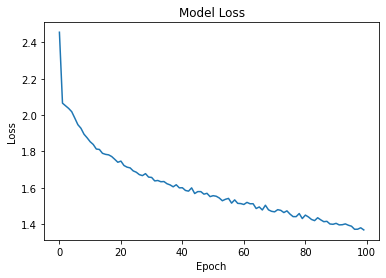

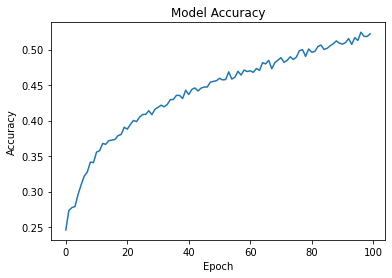

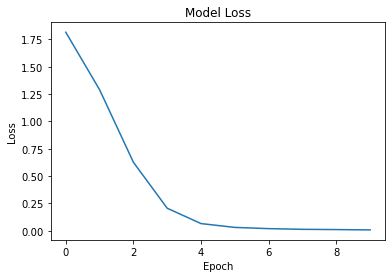

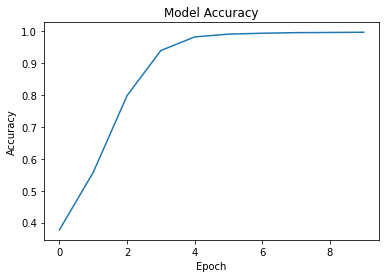

In [57]:
plot_history(history)
plot_history(history_2)

In [43]:
model_2.evaluate(x = meta_test['lyrics'], y = y_test_meta, steps = 10, verbose = 1)

10/10 [==============================] - 12s 1s/step - loss: 4.2635 - accuracy: 0.3761


[4.263523101806641, 0.37605544924736023]

## Bert Embeddings + Bert for Sequence Classifier

In [83]:
from transformers import BertTokenizer

tokenizer = BertTokenizer.from_pretrained('bert-base-uncased', do_lower_case = True)

In [84]:
train = pd.read_csv("final_train.csv")
test = pd.read_csv("final_test.csv")

In [85]:
# Tokenize all of the sentences and map the tokens to thier word IDs.
input_ids_train = []
attention_masks_train = []

for sentence in tqdm(train.Lyrics.values):
    encoded_dict = tokenizer.encode_plus(
                        sentence,                      # Sentence to encode.
                        add_special_tokens = True, # Add '[CLS]' and '[SEP]'
                        max_length = 64,           # Pad & truncate all sentences.
                        pad_to_max_length = True,
                        return_attention_mask = True,   # Construct attn. masks.
                        return_tensors = 'pt',     # Return pytorch tensors.
                   )
    
    # Add the encoded sentence to the list.    
    input_ids_train.append(encoded_dict['input_ids'])
    
    # And its attention mask (simply differentiates padding from non-padding).
    attention_masks_train.append(encoded_dict['attention_mask'])

# Convert the lists into tensors.
input_ids_train = torch.cat(input_ids_train, dim=0)
attention_masks_train = torch.cat(attention_masks_train, dim=0)
train_labels = torch.tensor(train.Genre_Encoded.values)


########## Validation

input_ids_valid = []
attention_masks_valid = []

# For every sentence...
for sentence in tqdm(test.Lyrics.astype(str).values):
    # `encode_plus` will:
    #   (1) Tokenize the sentence.
    #   (2) Prepend the `[CLS]` token to the start.
    #   (3) Append the `[SEP]` token to the end.
    #   (4) Map tokens to their IDs.
    #   (5) Pad or truncate the sentence to `max_length`
    #   (6) Create attention masks for [PAD] tokens.
    encoded_dict = tokenizer.encode_plus(
                        sentence,                      # Sentence to encode.
                        add_special_tokens = True, # Add '[CLS]' and '[SEP]'
                        max_length = 64,           # Pad & truncate all sentences.
                        pad_to_max_length = True,
                        return_attention_mask = True,   # Construct attn. masks.
                        return_tensors = 'pt',     # Return pytorch tensors.
                   )
    
    # Add the encoded sentence to the list.    
    input_ids_valid.append(encoded_dict['input_ids'])
    
    # And its attention mask (simply differentiates padding from non-padding).
    attention_masks_valid.append(encoded_dict['attention_mask'])

# Convert the lists into tensors.
input_ids_valid = torch.cat(input_ids_valid, dim=0)
attention_masks_valid = torch.cat(attention_masks_valid, dim=0)
valid_labels = torch.tensor(test.Genre_Encoded.values)

  0%|                                                                                        | 0/18513 [00:00<?, ?it/s]Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
C:\ProgramData\Anaconda3\lib\site-packages\transformers\tokenization_utils_base.py:2226: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for B

In [86]:
from torch.utils.data import TensorDataset

# Combine the training and validation inputs into TensorDataset
train_dataset = TensorDataset(input_ids_train, attention_masks_train, train_labels)
valid_dataset = TensorDataset(input_ids_valid, attention_masks_valid, valid_labels)

In [87]:
from torch.utils.data import DataLoader, WeightedRandomSampler, SequentialSampler

batch_size = 32

label = []

for i in tqdm(range(len(train_dataset))):
    label.append(train_dataset[i][2].item())

class_sample_count = np.array(
    [len(np.where(label == t)[0]) for t in np.unique(label)])
print(class_sample_count)
weight = 1. / class_sample_count
samples_weight = np.array([weight[t] for t in label])
samples_weight = torch.from_numpy(samples_weight)
samples_weigth = samples_weight.double()
print(samples_weight)
sampler = WeightedRandomSampler(samples_weight, len(samples_weight))


train_dataloader = DataLoader(
            train_dataset,  
            sampler = sampler, 
            batch_size = batch_size 
        )

validation_dataloader = DataLoader(
            valid_dataset, 
            sampler = SequentialSampler(valid_dataset), 
            batch_size = batch_size 
        )

100%|████████████████████████████████████████████████████████████████████████| 18513/18513 [00:00<00:00, 109121.09it/s]


[1153 1890 1540 2240 1190 3290 1890 2590 1190 1540]
tensor([0.0005, 0.0004, 0.0005,  ..., 0.0004, 0.0008, 0.0004],
       dtype=torch.float64)


In [88]:
import time, random, datetime, torch
from transformers import BertForSequenceClassification, AdamW, BertConfig, get_linear_schedule_with_warmup

# Load BertForSequenceClassification, the pretrained BERT model with a single linear classification layer on top. 
model = BertForSequenceClassification.from_pretrained(
    "bert-base-uncased", 
    num_labels = 10,   
    output_attentions = False, 
    output_hidden_states = False, 
)
optimizer = AdamW(model.parameters(),
                  lr = 2e-5,
                  eps = 1e-8
                )
epochs = 3

total_steps = len(train_dataloader) * epochs

scheduler = get_linear_schedule_with_warmup(optimizer, 
                                            num_warmup_steps = 0, 
                                            num_training_steps = total_steps)

def flat_accuracy(preds, labels):
    pred_flat = np.argmax(preds, axis=1).flatten()
    labels_flat = labels.flatten()
    return np.sum(pred_flat == labels_flat) / len(labels_flat)


def format_time(elapsed):
    elapsed_rounded = int(round((elapsed)))
    
    # Format as hh:mm:ss
    return str(datetime.timedelta(seconds=elapsed_rounded))

# If there's a GPU available...
if torch.cuda.is_available():    

    # Tell PyTorch to use the GPU.    
    device = torch.device("cuda")

    print('There are %d GPU(s) available.' % torch.cuda.device_count())

    print('We will use the GPU:', torch.cuda.get_device_name(0))

# If not...
else:
    print('No GPU available, using the CPU instead.')
    device = torch.device("cpu")

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForSequenceClassification: ['cls.predictions.bias', 'cls.predictions.decoder.weight', 'cls.predictions.transform.dense.weight', 'cls.seq_relationship.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.bias']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at

No GPU available, using the CPU instead.


In [89]:
seed_val = 42

random.seed(seed_val)
np.random.seed(seed_val)
torch.manual_seed(seed_val)
torch.cuda.manual_seed_all(seed_val)

training_stats = []

# Measure the total training time for the whole run.
total_t0 = time.time()

# For each epoch...
for epoch_i in range(0, epochs):
    print("")
    print('======== Epoch {:} / {:} ========'.format(epoch_i + 1, epochs))
    print('Training...')

    # Measure how long the training epoch takes.
    t0 = time.time()

    # Reset the total loss for this epoch.
    total_train_loss = 0

    model.train()

    # For each batch of training data...
    for step, batch in enumerate(train_dataloader):

        # Progress update every 40 batches.
        if step % 40 == 0 and not step == 0:
            # Calculate elapsed time in minutes.
            elapsed = format_time(time.time() - t0)
            # Report progress.
            print('  Batch {:>5,}  of  {:>5,}.    Elapsed: {:}.'.format(step, len(train_dataloader), elapsed))

        
        b_input_ids = batch[0].to(device)
        b_input_mask = batch[1].to(device)
        b_labels = batch[2].to(device)

        model.zero_grad()        

        model_output = model(b_input_ids, 
                             token_type_ids=None, 
                             attention_mask=b_input_mask, 
                             labels=b_labels)
        loss, logits = model_output.loss, model_output.logits

        total_train_loss += loss.item()

        loss.backward()

        # Clip the norm of the gradients to 1.0.
        # This is to help prevent the "exploding gradients" problem.
        torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)

        # Update parameters and take a step using the computed gradient.
        # The optimizer dictates the "update rule"--how the parameters are
        # modified based on their gradients, the learning rate, etc.
        optimizer.step()

        # Update the learning rate.
        scheduler.step()

    # Calculate the average loss over all of the batches.
    avg_train_loss = total_train_loss / len(train_dataloader)            
    
    # Measure how long this epoch took.
    training_time = format_time(time.time() - t0)

    print("")
    print("  Average training loss: {0:.2f}".format(avg_train_loss))
    print("  Training epcoh took: {:}".format(training_time))

    print("")
    print("Running Validation...")

    t0 = time.time()

    model.eval()

    total_eval_accuracy = 0
    total_eval_loss = 0
    nb_eval_steps = 0

    # Evaluate data for one epoch
    for batch in validation_dataloader:
        b_input_ids = batch[0].to(device)
        b_input_mask = batch[1].to(device)
        b_labels = batch[2].to(device)

        with torch.no_grad():
            model_output = model(b_input_ids, 
                                token_type_ids=None, 
                                attention_mask=b_input_mask,
                                labels=b_labels)
            (loss, logits) = model_output.loss, model_output.logits
            
        # Accumulate the validation loss.
        total_eval_loss += loss.item()

        # Move logits and labels to CPU
        logits = logits.detach().cpu().numpy()
        label_ids = b_labels.to('cpu').numpy()

        total_eval_accuracy += flat_accuracy(logits, label_ids)
        

    # Report the final accuracy for this validation run.
    avg_val_accuracy = total_eval_accuracy / len(validation_dataloader)
    print("  Accuracy: {0:.2f}".format(avg_val_accuracy))

    # Calculate the average loss over all of the batches.
    avg_val_loss = total_eval_loss / len(validation_dataloader)
    
    # Measure how long the validation run took.
    validation_time = format_time(time.time() - t0)
    
    print("  Validation Loss: {0:.2f}".format(avg_val_loss))
    print("  Validation took: {:}".format(validation_time))

    # Record all statistics from this epoch.
    training_stats.append(
        {
            'epoch': epoch_i + 1,
            'Training Loss': avg_train_loss,
            'Valid. Loss': avg_val_loss,
            'Valid. Accur.': avg_val_accuracy,
            'Training Time': training_time,
            'Validation Time': validation_time
        }
    )

print("")
print("Training complete!")
print("Total training took {:} (h:mm:ss)".format(format_time(time.time()-total_t0)))


======== Epoch 1 / 3 ========
Training...
  Batch    40  of    579.    Elapsed: 0:05:36.
  Batch    80  of    579.    Elapsed: 0:11:08.
  Batch   120  of    579.    Elapsed: 0:16:39.
  Batch   160  of    579.    Elapsed: 0:22:11.
  Batch   200  of    579.    Elapsed: 0:27:44.
  Batch   240  of    579.    Elapsed: 0:33:15.
  Batch   280  of    579.    Elapsed: 0:38:48.
  Batch   320  of    579.    Elapsed: 0:44:18.
  Batch   360  of    579.    Elapsed: 0:49:55.
  Batch   400  of    579.    Elapsed: 0:55:36.
  Batch   440  of    579.    Elapsed: 1:01:18.
  Batch   480  of    579.    Elapsed: 1:06:51.
  Batch   520  of    579.    Elapsed: 1:12:31.
  Batch   560  of    579.    Elapsed: 1:18:08.

  Average training loss: 1.84
  Training epcoh took: 1:20:40

Running Validation...
  Accuracy: 0.36
  Validation Loss: 1.81
  Validation took: 0:10:25

======== Epoch 2 / 3 ========
Training...
  Batch    40  of    579.    Elapsed: 0:05:24.
  Batch    80  of    579.    Elapsed: 0:10:49.
  Batch  

### Sentence Transformation

In [61]:
names = ['distiluse-base-multilingual-cased-v2',
         'xlm-r-distilroberta-base-paraphrase-v1',
         'xlm-r-bert-base-nli-stsb-mean-tokens',
         'distilbert-multilingual-nli-stsb-quora-ranking']

from sentence_transformers import SentenceTransformer
embedding_model = SentenceTransformer(names[1]) # change this index value to use another model

Downloading:   0%|          | 0.00/795 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/3.77k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/724 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/122 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/229 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.11G [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/5.07M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/150 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/9.10M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/556 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/190 [00:00<?, ?B/s]

In [64]:
train_embeddings = embedding_model.encode(meta_train.lyrics.values,show_progress_bar=True,batch_size=256)
val_embeddings = embedding_model.encode(meta_test.lyrics.values,show_progress_bar=True,batch_size=256)

Batches:   0%|          | 0/73 [00:00<?, ?it/s]

Batches:   0%|          | 0/31 [00:00<?, ?it/s]

In [65]:
def build_model():
  inp = tf.keras.layers.Input(shape=train_embeddings[0].shape)
  output = tf.keras.layers.Reshape((1,train_embeddings[0].shape[0]))(inp)

  output = tf.keras.layers.Bidirectional(tf.keras.layers.GRU(64,return_sequences=True))(output)
  output = tf.keras.layers.Bidirectional(tf.keras.layers.GRU(128))(output)

  # output = tf.keras.layers.BatchNormalization()(output)
  output = tf.keras.layers.Dense(256,activation="elu")(output)
  output = tf.keras.layers.BatchNormalization()(output)
  output = tf.keras.layers.Dropout(0.2)(output)

  output = tf.keras.layers.Dense(64,activation="relu")(output)
  output = tf.keras.layers.BatchNormalization()(output)
  output = tf.keras.layers.Dropout(0.2)(output)

  output = tf.keras.layers.Dense(16,activation="relu")(output)
  output = tf.keras.layers.BatchNormalization()(output)
  # output = tf.keras.layers.Dropout(0.2)(output)

  output_1 = tf.keras.layers.Dense(10,activation="softmax")(output)
  # model = tf.keras.models.Model(inp,output)

  model = tf.keras.models.Model(inp,output_1)
  # model.summary()
  return model

In [71]:
model_4 = build_model()
model_4.compile(loss="sparse_categorical_crossentropy", optimizer='adam', metrics = ['accuracy'])
history_4 = model_4.fit(np.array(train_embeddings),
                    y_train_meta,
                    epochs=50,
                    shuffle=True,
                    batch_size=128,
                    validation_data=(val_embeddings,y_test_meta),
                    callbacks=[tf.keras.callbacks.ReduceLROnPlateau(monitor="val_loss",patience=3,verbose=1,mode="min"),
                              tf.keras.callbacks.EarlyStopping(monitor='val_loss',patience=3,verbose=1,restore_best_weights=True)])


Epoch 1/50
145/145 [==============================] - 9s 21ms/step - loss: 2.0504 - accuracy: 0.2943 - val_loss: 2.0515 - val_accuracy: 0.3127 - lr: 0.0010
Epoch 2/50
145/145 [==============================] - 2s 13ms/step - loss: 1.8229 - accuracy: 0.3689 - val_loss: 1.9203 - val_accuracy: 0.3356 - lr: 0.0010
Epoch 3/50
145/145 [==============================] - 2s 13ms/step - loss: 1.7565 - accuracy: 0.3910 - val_loss: 1.7881 - val_accuracy: 0.3774 - lr: 0.0010
Epoch 4/50
145/145 [==============================] - 2s 13ms/step - loss: 1.7118 - accuracy: 0.4039 - val_loss: 1.7748 - val_accuracy: 0.3778 - lr: 0.0010
Epoch 5/50
145/145 [==============================] - 2s 13ms/step - loss: 1.6770 - accuracy: 0.4223 - val_loss: 1.7752 - val_accuracy: 0.3855 - lr: 0.0010
Epoch 6/50
145/145 [==============================] - 2s 13ms/step - loss: 1.6374 - accuracy: 0.4374 - val_loss: 1.7738 - val_accuracy: 0.3889 - lr: 0.0010
Epoch 7/50
145/145 [==============================] - 2s 13ms/st

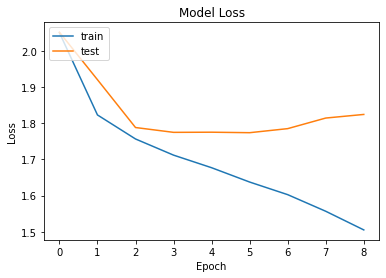

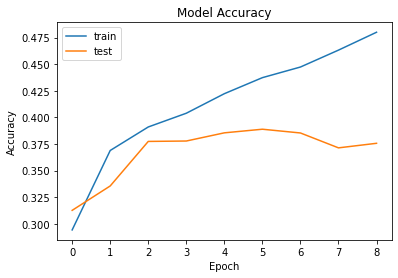

In [104]:
plt.plot(history_4.history['loss'])
plt.plot(history_4.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

plt.plot(history_4.history['accuracy'])
plt.plot(history_4.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [95]:
model_4.evaluate(val_embeddings,y_test_meta, steps = 10, verbose = 1)

10/10 [==============================] - 0s 17ms/step - loss: 1.7738 - accuracy: 0.3889


[1.773848295211792, 0.3889099061489105]

## Hyperparameter Optimization


In [72]:
import lightgbm as lgbm
from bayes_opt import BayesianOptimization

seed = 4249
folds = 5
lgbm_dataset_combined = lgbm.Dataset(data = combined_train_features, label = y_train_meta)
lgbm_dataset_only_lyrics = lgbm.Dataset(data = train_lyrics_words, label = y_train_meta)


def lgbm_cv_evaluator_combined(learning_rate, num_leaves, feature_fraction, bagging_fraction, max_depth):
    params = {  'objective':            'binary',
                'boosting':             'gbdt',
                'num_iterations':       1250, 
                'early_stopping_round': 100, 
                'metric':               'auc',
                'verbose':              -1
            }
    params['learning_rate'] = learning_rate
    params['num_leaves'] = int(round(num_leaves))
    params['feature_fraction'] = feature_fraction
    params['bagging_fraction'] = bagging_fraction
    params['max_depth'] = int(round(max_depth))     
    result = lgbm.cv(params, lgbm_dataset_combined, nfold = folds, seed = seed, 
                     stratified = True, verbose_eval = -1, metrics = ['auc']) 
    return max(result['auc-mean'])

def lgbm_cv_evaluator_lyrics(learning_rate, num_leaves, feature_fraction, bagging_fraction, max_depth):
    params = {  'objective':            'binary',
                'boosting':             'gbdt',
                'num_iterations':       1250, 
                'early_stopping_round': 100, 
                'metric':               'auc',
                'verbose':              -1
            }
    params['learning_rate'] = learning_rate
    params['num_leaves'] = int(round(num_leaves))
    params['feature_fraction'] = feature_fraction
    params['bagging_fraction'] = bagging_fraction
    params['max_depth'] = int(round(max_depth))
    result = lgbm.cv(params, lgbm_dataset_only_lyrics, nfold = folds, seed = seed, 
                     stratified = True, verbose_eval = -1, metrics = ['auc']) 
    return max(result['auc-mean'])

def bayesian_parameter_optimization_combined(init_rounds = 1, opt_rounds = 1):    
    
    optimizer = BayesianOptimization(f = lgbm_cv_evaluator_combined, 
                                    pbounds = { 'learning_rate':        (0.02, 0.06),
                                                'num_leaves':           (20, 100),
                                                'feature_fraction':     (0.25, 0.75),
                                                'bagging_fraction':     (0.75, 0.95),
                                                'max_depth':            (8, 15) },
                                    random_state = seed, 
                                    verbose = 2)

    optimizer.maximize(init_points = init_rounds, n_iter = opt_rounds, acq = "ei", kappa = 2, xi = 0.1)
    return optimizer.max

def bayesian_parameter_optimization_lyrics(init_rounds = 1, opt_rounds = 1):    
        optimizer = BayesianOptimization(f = lgbm_cv_evaluator_lyrics, 
                                    pbounds = { 'learning_rate':        (0.02, 0.06),
                                                'num_leaves':           (20, 100),
                                                'feature_fraction':     (0.25, 0.75),
                                                'bagging_fraction':     (0.75, 0.95),
                                                'max_depth':            (8, 15) },
                                    random_state = seed, 
                                    verbose = 2)
    optimizer.maximize(init_points = init_rounds, n_iter = opt_rounds, acq = "ei", kappa = 2, xi = 0.1)
    return optimizer.max

#### Final classifier

In [74]:
# Configure and Perform Bayesian Optimization 
max_params = bayesian_parameter_optimization_combined(init_rounds = 15, opt_rounds = 15)

print('================= Results')
print('Found Max AUC: {} with the following Parameters: '.format(max_params.get('target')))
print(max_params.get('params'))

|   iter    |  target   | baggin... | featur... | learni... | max_depth | num_le... |
-------------------------------------------------------------------------------------


C:\ProgramData\Anaconda3\lib\site-packages\lightgbm\engine.py:573: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
C:\ProgramData\Anaconda3\lib\site-packages\lightgbm\engine.py:620: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


|  1        |  0.768    |  0.8959   |  0.5461   |  0.05959  |  11.86    |  88.04    |


C:\ProgramData\Anaconda3\lib\site-packages\lightgbm\engine.py:573: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
C:\ProgramData\Anaconda3\lib\site-packages\lightgbm\engine.py:620: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


|  2        |  0.771    |  0.7965   |  0.5316   |  0.04652  |  11.9     |  97.12    |


C:\ProgramData\Anaconda3\lib\site-packages\lightgbm\engine.py:573: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
C:\ProgramData\Anaconda3\lib\site-packages\lightgbm\engine.py:620: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


|  3        |  0.7695   |  0.7682   |  0.5477   |  0.03136  |  8.698    |  45.08    |


C:\ProgramData\Anaconda3\lib\site-packages\lightgbm\engine.py:573: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
C:\ProgramData\Anaconda3\lib\site-packages\lightgbm\engine.py:620: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


|  4        |  0.7709   |  0.8058   |  0.5879   |  0.04879  |  9.612    |  66.72    |


C:\ProgramData\Anaconda3\lib\site-packages\lightgbm\engine.py:573: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
C:\ProgramData\Anaconda3\lib\site-packages\lightgbm\engine.py:620: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


|  5        |  0.7707   |  0.8724   |  0.4666   |  0.03018  |  14.36    |  83.35    |


C:\ProgramData\Anaconda3\lib\site-packages\lightgbm\engine.py:573: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
C:\ProgramData\Anaconda3\lib\site-packages\lightgbm\engine.py:620: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


|  6        |  0.775    |  0.9011   |  0.2624   |  0.03929  |  12.59    |  88.5     |


C:\ProgramData\Anaconda3\lib\site-packages\lightgbm\engine.py:573: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
C:\ProgramData\Anaconda3\lib\site-packages\lightgbm\engine.py:620: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


|  7        |  0.7666   |  0.7974   |  0.7268   |  0.05696  |  9.798    |  92.6     |


C:\ProgramData\Anaconda3\lib\site-packages\lightgbm\engine.py:573: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
C:\ProgramData\Anaconda3\lib\site-packages\lightgbm\engine.py:620: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


|  8        |  0.7708   |  0.9043   |  0.7145   |  0.05702  |  12.51    |  41.97    |


C:\ProgramData\Anaconda3\lib\site-packages\lightgbm\engine.py:573: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
C:\ProgramData\Anaconda3\lib\site-packages\lightgbm\engine.py:620: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


|  9        |  0.7691   |  0.7907   |  0.4242   |  0.056    |  11.34    |  43.81    |


C:\ProgramData\Anaconda3\lib\site-packages\lightgbm\engine.py:573: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
C:\ProgramData\Anaconda3\lib\site-packages\lightgbm\engine.py:620: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


|  10       |  0.772    |  0.7891   |  0.2782   |  0.04626  |  9.989    |  43.82    |


C:\ProgramData\Anaconda3\lib\site-packages\lightgbm\engine.py:573: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
C:\ProgramData\Anaconda3\lib\site-packages\lightgbm\engine.py:620: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


|  11       |  0.7701   |  0.7637   |  0.5645   |  0.05744  |  13.31    |  69.12    |


C:\ProgramData\Anaconda3\lib\site-packages\lightgbm\engine.py:573: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
C:\ProgramData\Anaconda3\lib\site-packages\lightgbm\engine.py:620: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


|  12       |  0.7711   |  0.9342   |  0.4611   |  0.02621  |  8.654    |  80.78    |


C:\ProgramData\Anaconda3\lib\site-packages\lightgbm\engine.py:573: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
C:\ProgramData\Anaconda3\lib\site-packages\lightgbm\engine.py:620: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


|  13       |  0.7738   |  0.7866   |  0.3901   |  0.02571  |  8.844    |  95.45    |


C:\ProgramData\Anaconda3\lib\site-packages\lightgbm\engine.py:573: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
C:\ProgramData\Anaconda3\lib\site-packages\lightgbm\engine.py:620: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


|  14       |  0.769    |  0.8567   |  0.7325   |  0.03341  |  9.528    |  62.66    |


C:\ProgramData\Anaconda3\lib\site-packages\lightgbm\engine.py:573: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
C:\ProgramData\Anaconda3\lib\site-packages\lightgbm\engine.py:620: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


|  15       |  0.7744   |  0.9322   |  0.2633   |  0.0254   |  12.55    |  96.73    |


C:\ProgramData\Anaconda3\lib\site-packages\lightgbm\engine.py:573: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
C:\ProgramData\Anaconda3\lib\site-packages\lightgbm\engine.py:620: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


|  16       |  0.7782   |  0.8013   |  0.3074   |  0.02317  |  14.88    |  42.0     |


C:\ProgramData\Anaconda3\lib\site-packages\lightgbm\engine.py:573: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
C:\ProgramData\Anaconda3\lib\site-packages\lightgbm\engine.py:620: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


|  17       |  0.7728   |  0.8877   |  0.5085   |  0.02255  |  11.34    |  57.55    |


C:\ProgramData\Anaconda3\lib\site-packages\lightgbm\engine.py:573: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
C:\ProgramData\Anaconda3\lib\site-packages\lightgbm\engine.py:620: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


|  18       |  0.7688   |  0.8383   |  0.3506   |  0.03878  |  10.95    |  97.94    |


C:\ProgramData\Anaconda3\lib\site-packages\lightgbm\engine.py:573: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
C:\ProgramData\Anaconda3\lib\site-packages\lightgbm\engine.py:620: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


|  19       |  0.7706   |  0.8765   |  0.5622   |  0.03786  |  12.29    |  97.05    |


C:\ProgramData\Anaconda3\lib\site-packages\lightgbm\engine.py:573: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
C:\ProgramData\Anaconda3\lib\site-packages\lightgbm\engine.py:620: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


|  20       |  0.7764   |  0.9402   |  0.3891   |  0.02837  |  12.64    |  98.8     |


C:\ProgramData\Anaconda3\lib\site-packages\lightgbm\engine.py:573: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
C:\ProgramData\Anaconda3\lib\site-packages\lightgbm\engine.py:620: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


|  21       |  0.7681   |  0.9088   |  0.7346   |  0.046    |  8.722    |  45.22    |


C:\ProgramData\Anaconda3\lib\site-packages\lightgbm\engine.py:573: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
C:\ProgramData\Anaconda3\lib\site-packages\lightgbm\engine.py:620: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


|  22       |  0.7732   |  0.7625   |  0.7476   |  0.03003  |  14.31    |  42.52    |


C:\ProgramData\Anaconda3\lib\site-packages\lightgbm\engine.py:573: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
C:\ProgramData\Anaconda3\lib\site-packages\lightgbm\engine.py:620: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


|  23       |  0.7688   |  0.8952   |  0.2847   |  0.04846  |  9.411    |  36.96    |


C:\ProgramData\Anaconda3\lib\site-packages\lightgbm\engine.py:573: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
C:\ProgramData\Anaconda3\lib\site-packages\lightgbm\engine.py:620: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


|  24       |  0.7683   |  0.7908   |  0.5609   |  0.05439  |  8.064    |  74.14    |


C:\ProgramData\Anaconda3\lib\site-packages\lightgbm\engine.py:573: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
C:\ProgramData\Anaconda3\lib\site-packages\lightgbm\engine.py:620: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


|  25       |  0.777    |  0.7766   |  0.291    |  0.02309  |  9.553    |  23.55    |


C:\ProgramData\Anaconda3\lib\site-packages\lightgbm\engine.py:573: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
C:\ProgramData\Anaconda3\lib\site-packages\lightgbm\engine.py:620: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


|  26       |  0.7713   |  0.8023   |  0.6639   |  0.03869  |  14.53    |  41.01    |


C:\ProgramData\Anaconda3\lib\site-packages\lightgbm\engine.py:573: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
C:\ProgramData\Anaconda3\lib\site-packages\lightgbm\engine.py:620: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


|  27       |  0.775    |  0.9295   |  0.2678   |  0.04325  |  8.61     |  23.01    |


C:\ProgramData\Anaconda3\lib\site-packages\lightgbm\engine.py:573: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
C:\ProgramData\Anaconda3\lib\site-packages\lightgbm\engine.py:620: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


|  28       |  0.7731   |  0.8889   |  0.4884   |  0.02178  |  8.722    |  24.44    |


C:\ProgramData\Anaconda3\lib\site-packages\lightgbm\engine.py:573: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
C:\ProgramData\Anaconda3\lib\site-packages\lightgbm\engine.py:620: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


|  29       |  0.7721   |  0.7563   |  0.4595   |  0.02502  |  10.96    |  56.78    |


C:\ProgramData\Anaconda3\lib\site-packages\lightgbm\engine.py:573: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
C:\ProgramData\Anaconda3\lib\site-packages\lightgbm\engine.py:620: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


|  30       |  0.7738   |  0.859    |  0.5334   |  0.0275   |  10.21    |  22.39    |
================= Results
Found Max AUC: 0.7782176771001657 with the following Parameters: 
{'bagging_fraction': 0.8013302423145455, 'feature_fraction': 0.30738437452696227, 'learning_rate': 0.023168448099711886, 'max_depth': 14.876233101804623, 'num_leaves': 42.00242744375031}


In [75]:
# Configure and Perform Bayesian Optimization 
max_params2 = bayesian_parameter_optimization_lyrics(init_rounds = 15, opt_rounds = 15)

print('================= Results')
print('Found Max AUC: {} with the following Parameters: '.format(max_params2.get('target')))
print(max_params2.get('params'))

|   iter    |  target   | baggin... | featur... | learni... | max_depth | num_le... |
-------------------------------------------------------------------------------------


C:\ProgramData\Anaconda3\lib\site-packages\lightgbm\engine.py:573: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
C:\ProgramData\Anaconda3\lib\site-packages\lightgbm\engine.py:620: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


|  1        |  0.7496   |  0.8959   |  0.5461   |  0.05959  |  11.86    |  88.04    |


C:\ProgramData\Anaconda3\lib\site-packages\lightgbm\engine.py:573: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
C:\ProgramData\Anaconda3\lib\site-packages\lightgbm\engine.py:620: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


|  2        |  0.7507   |  0.7965   |  0.5316   |  0.04652  |  11.9     |  97.12    |


C:\ProgramData\Anaconda3\lib\site-packages\lightgbm\engine.py:573: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
C:\ProgramData\Anaconda3\lib\site-packages\lightgbm\engine.py:620: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


|  3        |  0.7533   |  0.7682   |  0.5477   |  0.03136  |  8.698    |  45.08    |


C:\ProgramData\Anaconda3\lib\site-packages\lightgbm\engine.py:573: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
C:\ProgramData\Anaconda3\lib\site-packages\lightgbm\engine.py:620: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


|  4        |  0.748    |  0.8058   |  0.5879   |  0.04879  |  9.612    |  66.72    |


C:\ProgramData\Anaconda3\lib\site-packages\lightgbm\engine.py:573: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
C:\ProgramData\Anaconda3\lib\site-packages\lightgbm\engine.py:620: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


|  5        |  0.7536   |  0.8724   |  0.4666   |  0.03018  |  14.36    |  83.35    |


C:\ProgramData\Anaconda3\lib\site-packages\lightgbm\engine.py:573: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
C:\ProgramData\Anaconda3\lib\site-packages\lightgbm\engine.py:620: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


|  6        |  0.7468   |  0.9011   |  0.2624   |  0.03929  |  12.59    |  88.5     |


C:\ProgramData\Anaconda3\lib\site-packages\lightgbm\engine.py:573: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
C:\ProgramData\Anaconda3\lib\site-packages\lightgbm\engine.py:620: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


|  7        |  0.7479   |  0.7974   |  0.7268   |  0.05696  |  9.798    |  92.6     |


C:\ProgramData\Anaconda3\lib\site-packages\lightgbm\engine.py:573: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
C:\ProgramData\Anaconda3\lib\site-packages\lightgbm\engine.py:620: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


|  8        |  0.748    |  0.9043   |  0.7145   |  0.05702  |  12.51    |  41.97    |


C:\ProgramData\Anaconda3\lib\site-packages\lightgbm\engine.py:573: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
C:\ProgramData\Anaconda3\lib\site-packages\lightgbm\engine.py:620: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


|  9        |  0.7513   |  0.7907   |  0.4242   |  0.056    |  11.34    |  43.81    |


C:\ProgramData\Anaconda3\lib\site-packages\lightgbm\engine.py:573: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
C:\ProgramData\Anaconda3\lib\site-packages\lightgbm\engine.py:620: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


|  10       |  0.75     |  0.7891   |  0.2782   |  0.04626  |  9.989    |  43.82    |


C:\ProgramData\Anaconda3\lib\site-packages\lightgbm\engine.py:573: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
C:\ProgramData\Anaconda3\lib\site-packages\lightgbm\engine.py:620: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


|  11       |  0.7526   |  0.7637   |  0.5645   |  0.05744  |  13.31    |  69.12    |


C:\ProgramData\Anaconda3\lib\site-packages\lightgbm\engine.py:573: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
C:\ProgramData\Anaconda3\lib\site-packages\lightgbm\engine.py:620: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


|  12       |  0.7522   |  0.9342   |  0.4611   |  0.02621  |  8.654    |  80.78    |


C:\ProgramData\Anaconda3\lib\site-packages\lightgbm\engine.py:573: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
C:\ProgramData\Anaconda3\lib\site-packages\lightgbm\engine.py:620: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


|  13       |  0.7509   |  0.7866   |  0.3901   |  0.02571  |  8.844    |  95.45    |


C:\ProgramData\Anaconda3\lib\site-packages\lightgbm\engine.py:573: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
C:\ProgramData\Anaconda3\lib\site-packages\lightgbm\engine.py:620: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


|  14       |  0.7508   |  0.8567   |  0.7325   |  0.03341  |  9.528    |  62.66    |


C:\ProgramData\Anaconda3\lib\site-packages\lightgbm\engine.py:573: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
C:\ProgramData\Anaconda3\lib\site-packages\lightgbm\engine.py:620: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


|  15       |  0.7515   |  0.9322   |  0.2633   |  0.0254   |  12.55    |  96.73    |


C:\ProgramData\Anaconda3\lib\site-packages\lightgbm\engine.py:573: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
C:\ProgramData\Anaconda3\lib\site-packages\lightgbm\engine.py:620: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


|  16       |  0.7547   |  0.8013   |  0.3074   |  0.02317  |  14.88    |  42.0     |


C:\ProgramData\Anaconda3\lib\site-packages\lightgbm\engine.py:573: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
C:\ProgramData\Anaconda3\lib\site-packages\lightgbm\engine.py:620: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


|  17       |  0.752    |  0.8877   |  0.5085   |  0.02255  |  11.34    |  57.55    |


C:\ProgramData\Anaconda3\lib\site-packages\lightgbm\engine.py:573: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
C:\ProgramData\Anaconda3\lib\site-packages\lightgbm\engine.py:620: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


|  18       |  0.7529   |  0.8383   |  0.3506   |  0.03878  |  10.95    |  97.94    |


C:\ProgramData\Anaconda3\lib\site-packages\lightgbm\engine.py:573: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
C:\ProgramData\Anaconda3\lib\site-packages\lightgbm\engine.py:620: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


|  19       |  0.7528   |  0.8765   |  0.5622   |  0.03786  |  12.29    |  97.05    |


C:\ProgramData\Anaconda3\lib\site-packages\lightgbm\engine.py:573: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
C:\ProgramData\Anaconda3\lib\site-packages\lightgbm\engine.py:620: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


|  20       |  0.7529   |  0.9402   |  0.3891   |  0.02837  |  12.64    |  98.8     |


C:\ProgramData\Anaconda3\lib\site-packages\lightgbm\engine.py:573: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
C:\ProgramData\Anaconda3\lib\site-packages\lightgbm\engine.py:620: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


|  21       |  0.7464   |  0.7773   |  0.3058   |  0.05097  |  9.249    |  53.02    |


C:\ProgramData\Anaconda3\lib\site-packages\lightgbm\engine.py:573: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
C:\ProgramData\Anaconda3\lib\site-packages\lightgbm\engine.py:620: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


|  22       |  0.7542   |  0.9364   |  0.5853   |  0.0285   |  14.19    |  28.3     |


C:\ProgramData\Anaconda3\lib\site-packages\lightgbm\engine.py:573: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
C:\ProgramData\Anaconda3\lib\site-packages\lightgbm\engine.py:620: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


|  23       |  0.7491   |  0.8952   |  0.2847   |  0.04846  |  9.411    |  36.96    |


C:\ProgramData\Anaconda3\lib\site-packages\lightgbm\engine.py:573: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
C:\ProgramData\Anaconda3\lib\site-packages\lightgbm\engine.py:620: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


|  24       |  0.7503   |  0.7908   |  0.5609   |  0.05439  |  8.064    |  74.14    |


C:\ProgramData\Anaconda3\lib\site-packages\lightgbm\engine.py:573: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
C:\ProgramData\Anaconda3\lib\site-packages\lightgbm\engine.py:620: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


|  25       |  0.7541   |  0.7766   |  0.291    |  0.02309  |  9.553    |  23.55    |


C:\ProgramData\Anaconda3\lib\site-packages\lightgbm\engine.py:573: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
C:\ProgramData\Anaconda3\lib\site-packages\lightgbm\engine.py:620: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


|  26       |  0.7484   |  0.7709   |  0.5467   |  0.03789  |  14.98    |  93.16    |


C:\ProgramData\Anaconda3\lib\site-packages\lightgbm\engine.py:573: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
C:\ProgramData\Anaconda3\lib\site-packages\lightgbm\engine.py:620: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


|  27       |  0.7496   |  0.866    |  0.719    |  0.04986  |  8.782    |  62.58    |


C:\ProgramData\Anaconda3\lib\site-packages\lightgbm\engine.py:573: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
C:\ProgramData\Anaconda3\lib\site-packages\lightgbm\engine.py:620: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


|  28       |  0.7488   |  0.8899   |  0.2792   |  0.04297  |  8.253    |  31.96    |


C:\ProgramData\Anaconda3\lib\site-packages\lightgbm\engine.py:573: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
C:\ProgramData\Anaconda3\lib\site-packages\lightgbm\engine.py:620: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


|  29       |  0.7513   |  0.7563   |  0.4595   |  0.02502  |  10.96    |  56.78    |


C:\ProgramData\Anaconda3\lib\site-packages\lightgbm\engine.py:573: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
C:\ProgramData\Anaconda3\lib\site-packages\lightgbm\engine.py:620: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


|  30       |  0.7491   |  0.7922   |  0.6789   |  0.05187  |  11.44    |  95.75    |
================= Results
Found Max AUC: 0.7547160500372533 with the following Parameters: 
{'bagging_fraction': 0.8013302423145455, 'feature_fraction': 0.30738437452696227, 'learning_rate': 0.023168448099711886, 'max_depth': 14.876233101804623, 'num_leaves': 42.00242744375031}
